In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from pygam import LinearGAM, s, f
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
import feature_engine.imputation as imp
from feature_engine.encoding import OneHotEncoder

import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv("Xtrain_feature_sel_low_tol.csv")
X_test = pd.read_csv("Xtest_feature_sel_low_tol.csv")
ytrain = pd.read_csv("ytrain_mod.csv")
ytest = pd.read_csv("ytest_mod.csv")
print("Shape of X Train: {}".format(X_train.shape))
print("Shape of X Test: {}".format(X_test.shape))
print("Shape of y Train: {}".format(ytrain.shape))
print("Shape of y Test: {}".format(ytest.shape))

Shape of X Train: (8672, 19)
Shape of X Test: (2168, 19)
Shape of y Train: (8672, 1)
Shape of y Test: (2168, 1)


In [3]:
# types of the variables
X_train.dtypes

Reviews                    float64
Rating                     float64
days_since_update          float64
Price                      float64
Category_FAMILY              int64
Category_GAME                int64
Category_Rare                int64
Category_TOOLS               int64
Size_Varies with device      int64
Size_0.1-10MB                int64
Size_10.1-20MB               int64
Size_30.1-40MB               int64
Size_20.1-30MB               int64
Type_Free                    int64
Content Rating_Everyone      int64
Content Rating_Teen          int64
Genres_Entertainment         int64
Genres_Rare                  int64
Genres_Education             int64
dtype: object

In [4]:
variable = "Size_Varies with device"

# create linear regression
regr = linear_model.LinearRegression()
# train model using training set
reg = regr.fit(X_train[[variable]],ytrain)

In [5]:
# regression coefficients
print('Coefficients: ', reg.coef_)
# intercept
print('intercept: ', reg.intercept_)

Coefficients:  [[55273727.54366109]]
intercept:  [7093261.27724535]


Text(0, 0.5, 'Installs')

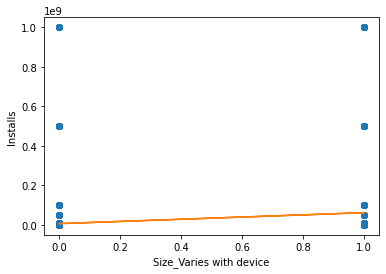

In [11]:
plt.plot(X_train[[variable]],ytrain,'o')
plt.plot(X_train[[variable]],reg.coef_*X_train[[variable]]+reg.intercept_)

plt.xlabel(X_train[[variable]].columns[0])
plt.ylabel("Installs")

# Go through all variables